In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


11501568/11490434 [==============================] - 0s 0us/step


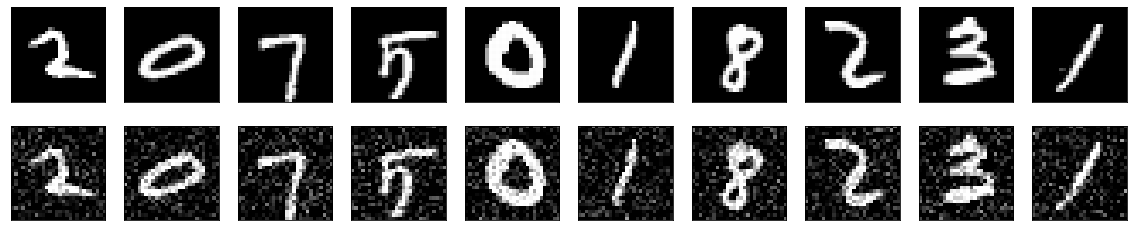

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model

def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    noise_factor = 0.2
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


"""
## data preparation
"""

(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

display(train_data, noisy_train_data)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

2021-12-21 08:47:36.893854: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


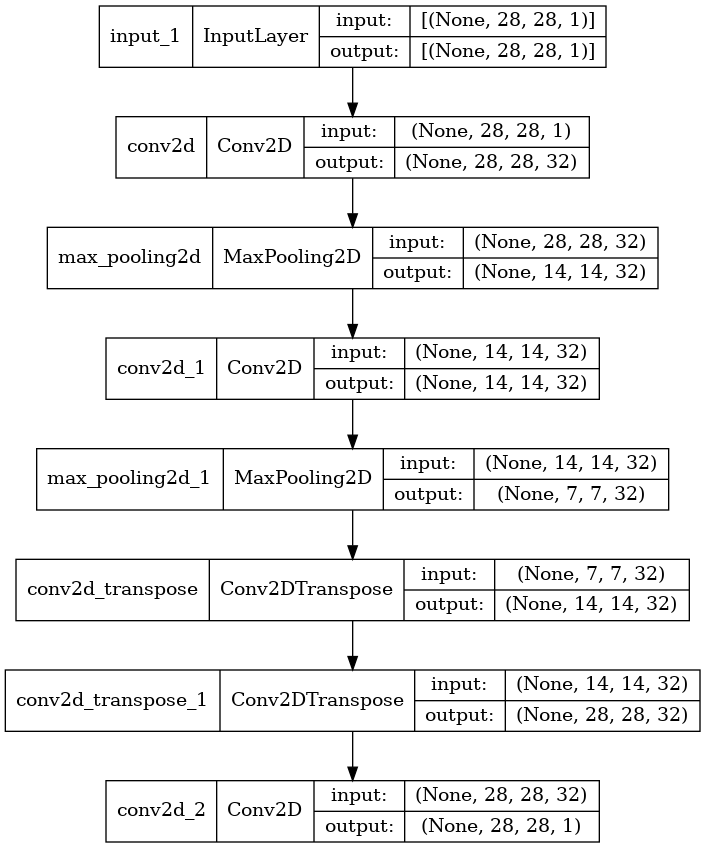

In [3]:
"""
## Build the autoencoder
2D Convloutional autoencoder
"""

inputs = layers.Input(shape=(28, 28, 1)) #color dimension

# Encoder
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x) #normalized Data I/O 이므로...!

# Autoencoder
autoencoder = Model(inputs, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
plot_model(autoencoder,show_shapes=True)

In [ ]:
# train 
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=20,
    batch_size=10000,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)


2021-12-21 08:47:37.164242: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2021-12-21 08:47:37.222376: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20


2021-12-21 08:47:37.945361: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1003520000 exceeds 10% of free system memory.
2021-12-21 08:47:38.315998: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 250880000 exceeds 10% of free system memory.
2021-12-21 08:47:38.426287: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 250880000 exceeds 10% of free system memory.


1/6 [====>.........................] - ETA: 1:19 - loss: 0.6881

In [ ]:
from keras.datasets.fashion_mnist import load_data

(X_train_full, y_train_full), (X_test, y_test) = load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:] 

targets = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 3
n_cols = 8
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols)  :
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(targets[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
i = 345
origin = X_train[345]
add_noi = noise(origin)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

axes[0].imshow(origin)
axes[1].imshow(add_noi)
plt.show()


In [ ]:
add_noi = np.reshape(add_noi, (1,28,28,1))
predictions = autoencoder.predict(add_noi)
print(predictions.shape)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

axes[0].imshow(origin)
axes[1].imshow(add_noi[0,:,:,0])
axes[2].imshow(predictions[0,:,:,0])
plt.show()